In [55]:
import pandas as pd

df = pd.read_csv('/home/charles/myproject/ChessOnlineStudy/User+perception+of+a+talking+chess+robot_February+13,+2025_00.44_597.csv')

df.columns = df.iloc[0]  # Set the first row as column headers
df = df[1:].reset_index(drop=True)  # Remove the first row and reset index

# Identify duplicate column names
from collections import defaultdict

# Create a dictionary to store columns with the same base name
column_groups = defaultdict(list)

for col in df.columns:
    base_name = col.split(".")[0]  # Remove any duplicated suffix (e.g., ".1", ".2")
    column_groups[base_name].append(col)

# Create a new DataFrame with merged data
df_merged = pd.DataFrame()

for base_name, col_variants in column_groups.items():
    # If there's only one column, just copy it
    if len(col_variants) == 1:
        df_merged[base_name] = df[col_variants[0]]
    else:
        # Merge multiple columns by taking the first non-null value
        df_merged[base_name] = df[col_variants].bfill(axis=1).iloc[:, 0]

df = df_merged.copy()
df_merged

,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,"Ability to perform repetitive, routine tasks",Ability to reason inductively,Ability to detect small amounts of visual or acoustic energy,Ability to perceive patterns of light or sound,Ability to store very large amounts of information for long periods and to recall relevant facts at the appropriate time,Ability to store information briefly and then to erase it completely,"Ability to reason deductively, including computational ability",Please provide any suggestions or comments on the survey,PROLIFIC_PID,Group
0,2/12/2025 22:24,2/12/2025 22:32,IP Address,35.149.89.124,100,510,True,2/12/2025 22:32,R_3eqq7Gofo6sZ3Tk,NaN,...,Machines surpass humans,Machines surpass humans,Humans surpass machines,Machines surpass humans,Machines surpass humans,Machines surpass humans,Machines surpass humans,But it all depends on human programming.,5cdf2adac194e800187ad97a,3
1,2/12/2025 22:31,2/12/2025 22:35,IP Address,47.226.136.65,100,228,True,2/12/2025 22:35,R_5J8uHvrhM4sRIjL,NaN,...,Machines surpass humans,Humans surpass machines,Humans surpass machines,Humans surpass machines,Machines surpass humans,Machines surpass humans,Machines surpass humans,NaN,672cd3353e6ad16c974da631,2
2,2/12/2025 22:29,2/12/2025 22:35,IP Address,52.124.94.224,100,363,True,2/12/2025 22:35,R_6OGEs9Jk37UWjM2,NaN,...,Machines surpass humans,Humans surpass machines,Machines surpass humans,Machines surpass humans,Machines surpass humans,Machines surpass humans,Humans surpass machines,NaN,67ad02d116c0e031b208cf87,1
3,2/12/2025 22:27,2/12/2025 22:36,IP Address,70.53.49.139,100,485,True,2/12/2025 22:36,R_7EbCXnJ4ZDFVQc9,NaN,...,Machines surpass humans,Humans surpass machines,Machines surpass humans,Machines surpass humans,Machines surpass humans,Machines surpass humans,Machines surpass humans,No issues with this survey! Thank you,67acd62125f6249308864042,2
4,2/12/2025 22:27,2/12/2025 22:36,IP Address,74.192.54.73,100,516,True,2/12/2025 22:36,R_8FWlrwL9VWbkqlK,NaN,...,Machines surpass humans,Humans surpass machines,Machines surpass humans,Machines surpass humans,Machines surpass humans,Machines surpass humans,Machines surpass humans,NaN,6768b5659a4b80b12fe08568,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,2/13/2025 0:00,2/13/2025 0:06,IP Address,92.25.168.120,100,367,True,2/13/2025 0:06,R_8cUBTXrjeEqbwfD,NaN,...,Humans surpass machines,Humans surpass machines,Machines surpass humans,Machines surpass humans,Machines surpass humans,Humans surpass machines,Machines surpass humans,Everything worked well and the instructions we...,5c86f9ced810a700169ddfe7,2
593,2/13/2025 0:01,2/13/2025 0:09,IP Address,80.235.129.20,100,488,True,2/13/2025 0:09,R_8Hk1ZYuWBC6z3dF,NaN,...,Machines surpass humans,Humans surpass machines,Machines surpass humans,Machines surpass humans,Machines surpass humans,Humans surpass machines,Machines surpass humans,NaN,66337ff0f7893ff3217a038a,2
594,2/13/2025 0:07,2/13/2025 0:12,IP Address,174.119.199.89,100,314,True,2/13/2025 0:12,R_3D0NwWA1A4pE3tL,NaN,...,Machines surpass humans,Humans surpass machines,Humans surpass machines,Machines surpass humans,Machines surpass humans,Machines surpass humans,Humans surpass machines,NaN,64fe4015250d9972529f7d10,1
595,2/13/2025 0:16,2/13/2025 0:31,IP Address,176.27.44.25,100,867,True,2/13/2025 0:31,R_2ozlRcIZoDwzO38,NaN,...,I prefer not to respond,I prefer not to respond,I prefer not to respond,I prefer not to respond,I prefer not to respond,I prefer not to respond,I prefer not to respond,No comment,6658b8b757f8a9ca5f6e404b,2


In [56]:
df_merged['How do you describe yourself?'].value_counts(normalize=True)

How do you describe yourself?
Female                     0.505863
Male                       0.479062
Other                      0.013400
I prefer not to respond    0.001675
Name: proportion, dtype: float64

In [57]:
# Check if there is a column indicating the group
df.columns = df.columns.astype(str)  # Ensure all column names are strings
# Segment the data based on the scenario group
scenario_groups = {
    "A. Robotics Education": df[df["Group"] == "1"],
    "B. Chess Coach": df[df["Group"] == "2"],
    "C. Home Entertainment": df[df["Group"] == "3"],
}

In [58]:
# Identify acceptance-related questions
acceptance_questions = {
    "A. Robotics Education": "Do you think this robot could be used in schools to explain to students how a robot works?",
    "B. Chess Coach": "Do you think this robot could be used in schools to teach students chess?",
    "C. Home Entertainment": "Do you think this robot could be used at home to provide entertainment?"
}

# Prepare data for stacked bar chart
import matplotlib.pyplot as plt

acceptance_levels = ["Definitely yes", "Probably yes", "Neutral", "Probably not", "Definitely not"]
scenario_labels = list(acceptance_questions.keys())
acceptance_data = {scenario: scenario_groups[scenario][question].value_counts(normalize=True) for scenario, question in acceptance_questions.items()}

# Create a DataFrame to store the proportions of each level of acceptance
acceptance_df = pd.DataFrame(acceptance_data).fillna(0).reindex(acceptance_levels)

In [59]:
# Identify acceptance-related questions
replacement_human_question = "Would you welcome a future where robots that can talk, equipped with artificial intelligence (such as improved versions of ChatGPT), replace human workers?"
replacement_human_questions = {
    "A. Robotics Education": replacement_human_question,
    "B. Chess Coach": replacement_human_question,
    "C. Home Entertainment": replacement_human_question
}

answers = ["Definitely yes", "Probably yes", "Neutral", "Probably not", "Definitely not"]
scenario_labels = list(replacement_human_questions.keys())
answer_data = {scenario: scenario_groups[scenario][question].value_counts(normalize=True) for scenario, question in replacement_human_questions.items()}

# Create a DataFrame to store the proportions of answers of the replacement_human question
replacement_human_df = pd.DataFrame(answer_data).fillna(0).reindex(answers)


In [60]:
answer_data

{'A. Robotics Education': Would you welcome a future where robots that can talk, equipped with artificial intelligence (such as improved versions of ChatGPT), replace human workers?
 Probably yes      0.287179
 Probably not      0.235897
 Neutral           0.205128
 Definitely not    0.148718
 Definitely yes    0.123077
 Name: proportion, dtype: float64,
 'B. Chess Coach': Would you welcome a future where robots that can talk, equipped with artificial intelligence (such as improved versions of ChatGPT), replace human workers?
 Neutral           0.265403
 Probably not      0.236967
 Probably yes      0.203791
 Definitely not    0.161137
 Definitely yes    0.132701
 Name: proportion, dtype: float64,
 'C. Home Entertainment': Would you welcome a future where robots that can talk, equipped with artificial intelligence (such as improved versions of ChatGPT), replace human workers?
 Probably yes      0.235602
 Neutral           0.225131
 Probably not      0.219895
 Definitely not    0.198953

In [61]:
# Count the number of people who chose "I prefer not to respond"
for s, q in acceptance_questions.items():
    count_prefer_not_to_respond = scenario_groups[s][scenario_groups[s][q] == "I prefer not to respond"].shape[0]
    print(f"{s}: {count_prefer_not_to_respond} respondents preferred not to respond.")

count_prefer_not_to_respond = df[df[replacement_human_question] == "I prefer not to respond"].shape[0]
print(f"A/B/C: {count_prefer_not_to_respond} respondents preferred not to respond.")


A. Robotics Education: 0 respondents preferred not to respond.
B. Chess Coach: 1 respondents preferred not to respond.
C. Home Entertainment: 0 respondents preferred not to respond.
A/B/C: 0 respondents preferred not to respond.


In [62]:
combined_df = pd.read_csv('Q7_annotated_three_scenarios_final.csv')

# Define categories and scenario labels for consistent indexing and plotting order
categories = ["positive", "neutral", "negative"]
scenario_labels = ['A. Robotics Education', 'B. Chess Coach', 'C. Home Entertainment']
group_id_mapping = {'A. Robotics Education': 1, 'B. Chess Coach':2, 'C. Home Entertainment':3}

# Calculate the proportion of each category within each scenario
category_proportions = {}
for scenario in scenario_labels:
    scenario_data = combined_df[combined_df['Group'] == group_id_mapping[scenario]]
    category_counts = scenario_data['Category_Final'].value_counts(normalize=True).reindex(categories).fillna(0)
    category_proportions[scenario] = category_counts

# Create a DataFrame to store the proportions, reindex to ensure categories order
attitude_df = pd.DataFrame(category_proportions).reindex(categories)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


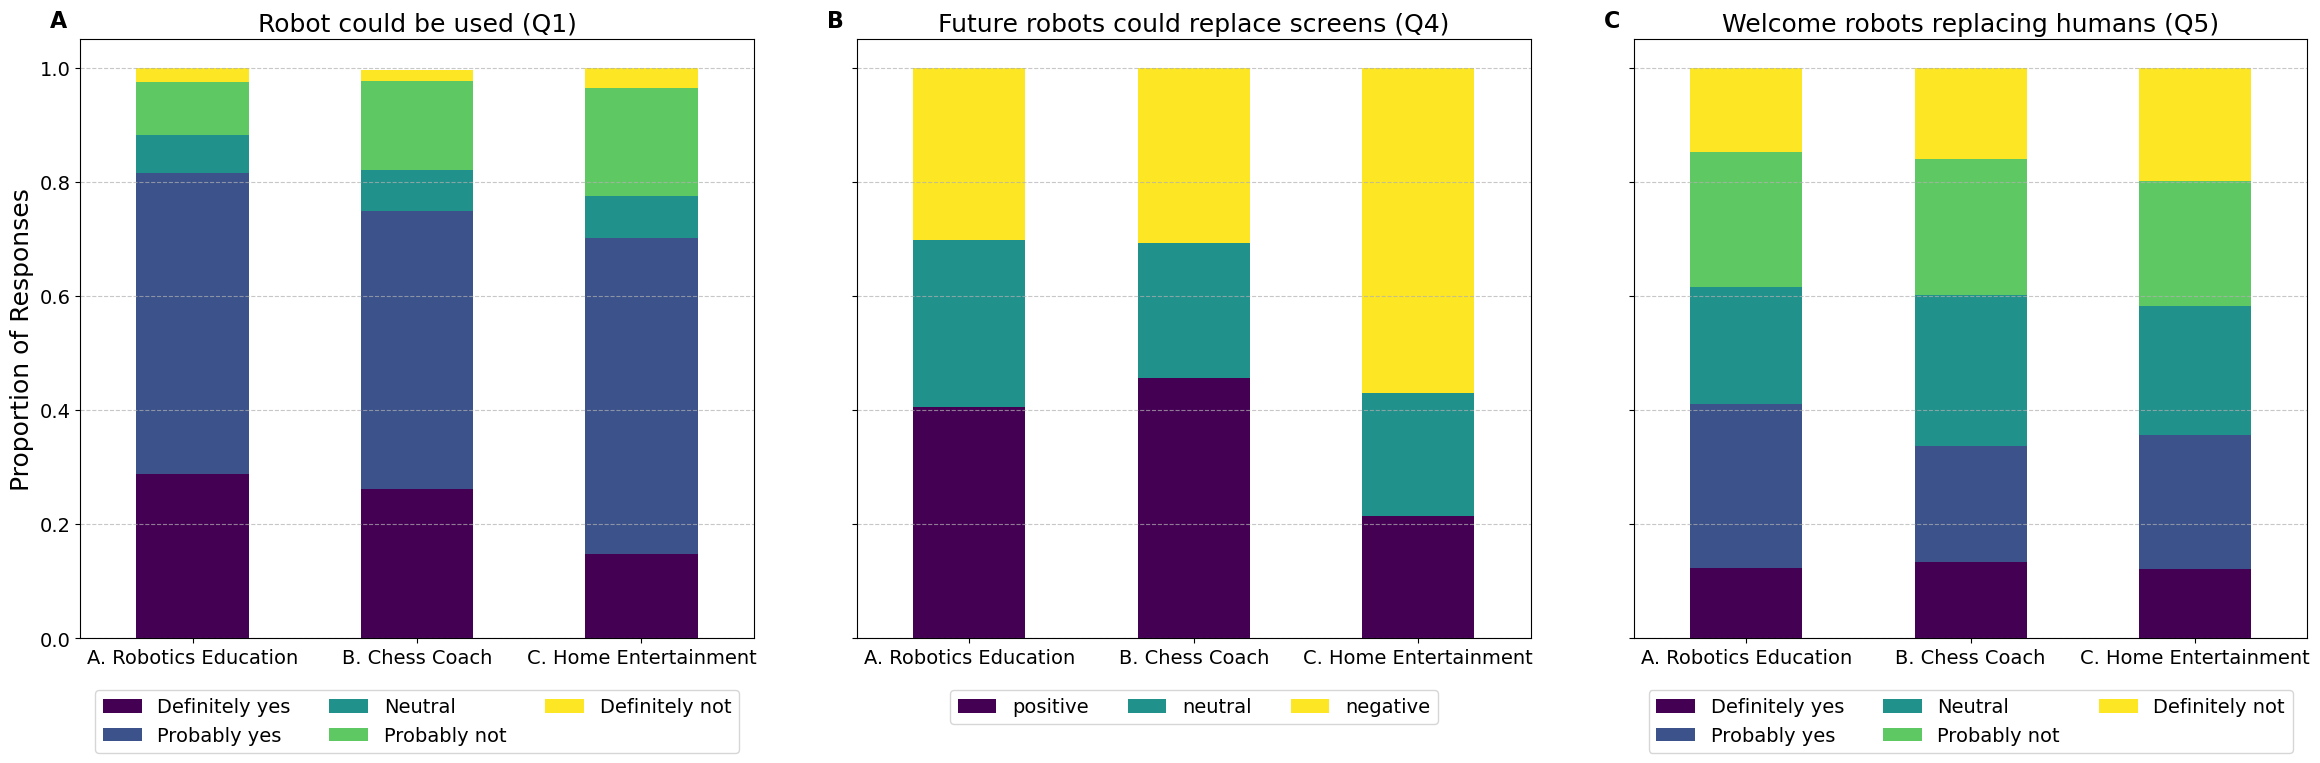

DataFrame with attitude proportions:
                A. Robotics Education  B. Chess Coach  C. Home Entertainment
Definitely yes               0.287179        0.260664               0.146597
Probably yes                 0.528205        0.488152               0.554974
Neutral                      0.066667        0.071090               0.073298
Probably not                 0.092308        0.156398               0.188482
Definitely not               0.025641        0.018957               0.036649


In [63]:
import matplotlib.pyplot as plt

# Set larger font sizes
plt.rcParams.update({'font.size': 18, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 14, 'ytick.labelsize': 14, 'legend.fontsize': 14})

# Prepare data for stacked bar chart for acceptance levels
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8), sharey=True)

# Plot stacked bar chart for acceptance levels
acceptance_df.T.plot(kind="bar", stacked=True, ax=ax1, cmap="viridis", legend=False)
ax1.set_title("Robot could be used (Q1)")
# ax1.set_xlabel("Scenarios")
ax1.set_ylabel("Proportion of Responses")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.grid(axis="y", linestyle="--", alpha=0.7)
ax1.legend(bbox_to_anchor=(0.5, -0.07), loc='upper center', ncol=3)
ax1.text(-0.02, 1.05, 'A', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

# Plotting the attitude distribution
attitude_df.T.plot(kind='bar', stacked=True, ax=ax2, cmap="viridis", legend=True)
ax2.set_title('Future robots could replace screens (Q4)')
# ax2.set_xlabel('Attitude Category')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.grid(axis="y", linestyle="--", alpha=0.7)
ax2.legend(bbox_to_anchor=(0.5, -0.07), loc='upper center', ncol=3)
ax2.text(-0.02, 1.05, 'B', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

# Plot stacked bar chart for replacement human question
replacement_human_df.T.plot(kind="bar", stacked=True, ax=ax3, cmap="viridis", legend=False)
ax3.set_title("Welcome robots replacing humans (Q5)")
# ax3.set_xlabel("Scenarios")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)
ax3.grid(axis="y", linestyle="--", alpha=0.7)
ax3.legend(bbox_to_anchor=(0.5, -0.07), loc='upper center', ncol=3)
ax3.text(-0.02, 1.05, 'C', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

plt.tight_layout()
fig.savefig('destination_path.eps', dpi=600, format='eps')
plt.show()

print("DataFrame with attitude proportions:")
print(acceptance_df)


In [64]:
attitude_df

,A. Robotics Education,B. Chess Coach,C. Home Entertainment
Category_Final,,,
positive,0.405128,0.454976,0.214660
neutral,0.292308,0.236967,0.214660
negative,0.302564,0.308057,0.570681


In [65]:
acceptance_questions

{'A. Robotics Education': 'Do you think this robot could be used in schools to explain to students how a robot works?',
 'B. Chess Coach': 'Do you think this robot could be used in schools to teach students chess?',
 'C. Home Entertainment': 'Do you think this robot could be used at home to provide entertainment?'}

In [66]:
import scipy.stats as stats

# Convert categorical acceptance levels to numerical values for statistical comparison
answer_mapping = {
    "Definitely not": 1,
    "Probably not": 2,
    "Neutral": 3,
    "Probably yes": 4,
    "Definitely yes": 5,
    "I prefer not to respond": None  # Exclude from numerical analysis
}

# Convert responses to numerical values per scenario
numerical_data = {}
for scenario, question in acceptance_questions.items():
    if question in df.columns:
        numerical_data[scenario] = scenario_groups[scenario][question].map(answer_mapping)
    else:
        print("question didn't match the column names")

# Perform statistical tests
# anova_result = stats.f_oneway(numerical_data["A. Robotics Education"],
#                               numerical_data["B. Chess Coach"],
#                               numerical_data["C. Home Entertainment"])

# Perform pairwise t-tests
t_test_results = {}
scenarios = list(numerical_data.keys())
for i in range(len(scenarios)):
    for j in range(i + 1, len(scenarios)):
        t_stat, p_value = stats.ttest_ind(numerical_data[scenarios[i]], numerical_data[scenarios[j]], equal_var=False)
        t_test_results[f"{scenarios[i]} vs {scenarios[j]}"] = (t_stat, p_value)

# Display ANOVA result and pairwise t-test results
print(f"pairewise t-test results for Q4: \n{t_test_results}")


pairewise t-test results for Q4: 
{'A. Robotics Education vs B. Chess Coach': (nan, nan), 'A. Robotics Education vs C. Home Entertainment': (3.5738121649250836, 0.0003971627431075584), 'B. Chess Coach vs C. Home Entertainment': (nan, nan)}


In [67]:
numerical_data[scenarios[2]].describe()

count    191.000000
mean       3.586387
std        1.067029
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Do you think this robot could be used at home to provide entertainment?, dtype: float64

In [68]:
import csv

def save_q7_responses(include_pid=True):
    # Display column names to identify the correct Q7-related questions
    q7_related_columns = [col for col in df_merged.columns if "10 years" in col or "replacement" in col]

    # Identifying Group column
    group_column = "Group"
    pid_column = "PROLIFIC_PID"

    group_files = {
        "1": "Scenario_A_Q7.csv",
        "2": "Scenario_B_Q7.csv",
        "3": "Scenario_C_Q7.csv"
    }
    # Extract Q7 responses and save to CSV based on group
    saved_files = {}

    for group_id, file_path in group_files.items():
        # Selecting the corresponding Q7 column based on group
        scenario_index = int(group_id) - 1
        q7_column = q7_related_columns[scenario_index]

        # Extracting data for the given group
        if include_pid:
            df_group = df_merged[df_merged[group_column] == group_id][[pid_column, q7_column]]
        else:
            df_group = df_merged[df_merged[group_column] == group_id][[q7_column]]

        # Renaming Q7 column for clarity
        df_group.rename(columns={q7_column: "Q7_Response"}, inplace=True)

        # Saving to CSV
        df_group.to_csv(file_path, index=False, quoting=csv.QUOTE_ALL)
        saved_files[group_id] = file_path
        print(len(df_group))

    return saved_files

# Example usage:
saved_files = save_q7_responses(include_pid=False)


195
211
191


In [69]:
def save_responses(save_all_columns=True):
    # Define the questions for Q5 and Q6
    q5 = "Comment on the technical quality of the robot as shown in the video"
    q6 = "Do you have any recommendations about how to improve the robot?"

    # Identifying Group column
    group_column = "Group"
    pid_column = "PROLIFIC_PID"

    # Define file paths for Q5 and Q6 responses
    group_files_q5 = {
        "1": "Scenario_A_Q5.csv",
        "2": "Scenario_B_Q5.csv",
        "3": "Scenario_C_Q5.csv"
    }

    group_files_q6 = {
        "1": "Scenario_A_Q6.csv",
        "2": "Scenario_B_Q6.csv",
        "3": "Scenario_C_Q6.csv"
    }

    # Extract Q5 and Q6 responses and save to CSV based on group
    saved_files_q5 = {}
    saved_files_q6 = {}

    for group_id, file_path in group_files_q5.items():
        # Extracting data for Q5 for the given group
        if save_all_columns:
            df_group_q5 = df[df[group_column] == group_id][[pid_column, q5, group_column]]
        else:
            df_group_q5 = df[df[group_column] == group_id][[q5]]
        df_group_q5.rename(columns={q5: "Q5_Response"}, inplace=True)
        df_group_q5.to_csv(file_path, index=False, quoting=csv.QUOTE_ALL)
        saved_files_q5[group_id] = file_path
        print(f"Saved {len(df_group_q5)} Q5 responses for group {group_id} to {file_path}")

    for group_id, file_path in group_files_q6.items():
        # Extracting data for Q6 for the given group
        if save_all_columns:
            df_group_q6 = df[df[group_column] == group_id][[pid_column, q6, group_column]]
        else:
            df_group_q6 = df[df[group_column] == group_id][[q6]]
        df_group_q6.rename(columns={q6: "Q6_Response"}, inplace=True)
        df_group_q6.to_csv(file_path, index=False, quoting=csv.QUOTE_ALL)
        saved_files_q6[group_id] = file_path
        print(f"Saved {len(df_group_q6)} Q6 responses for group {group_id} to {file_path}")

    return saved_files_q5, saved_files_q6

# Example usage:
saved_files_q5, saved_files_q6 = save_responses(save_all_columns=False)


Saved 195 Q5 responses for group 1 to Scenario_A_Q5.csv
Saved 211 Q5 responses for group 2 to Scenario_B_Q5.csv
Saved 191 Q5 responses for group 3 to Scenario_C_Q5.csv
Saved 195 Q6 responses for group 1 to Scenario_A_Q6.csv
Saved 211 Q6 responses for group 2 to Scenario_B_Q6.csv
Saved 191 Q6 responses for group 3 to Scenario_C_Q6.csv


In [70]:
import pandas as pd

# Define file paths for the three CSV files
file_paths = {
    "A. Robotics Education": ["Scenario_A_Q7_o3.csv", "Scenario_A_Q7_Gemini.csv"],
    "B. Chess Coach": ["Scenario_B_Q7_o3.csv", "Scenario_B_Q7_Gemini.csv"],
    "C. Home Entertainment": ["Scenario_C_Q7_o3.csv", "Scenario_C_Q7_Gemini.csv"],
}

# Create an empty list to store merged DataFrames
merged_dfs = []

# Process each scenario
for scenario_name, paths in file_paths.items():
    # Read the two CSV files for the scenario
    df_o = pd.read_csv(paths[0])
    df_g = pd.read_csv(paths[1])
    
    # Rename the Category columns
    df_o.rename(columns={'Category': 'Category_o'}, inplace=True)
    df_g.rename(columns={'Category': 'Category_G'}, inplace=True)
    
    # Merge the DataFrames on PROLIFIC_PID and Q7_Response
    merged_df = pd.merge(df_o, df_g, on=['PROLIFIC_PID'])
    merged_df.drop('Q7_Response_y', axis=1, inplace=True)
    merged_df.rename(columns={'Q7_Response_y': 'Q7_Response'}, inplace=True)
    
    # Add Agreed and Category_Final columns
    merged_df['Agreed'] = merged_df['Category_o'] == merged_df['Category_G']
    merged_df['Category_Final'] = merged_df.apply(
        lambda row: row['Category_o'] if row['Agreed'] else None, axis=1
    )
    
    # Add the Group column based on the scenario
    group_value = "1" if "A" in scenario_name else "2" if "B" in scenario_name else "3"
    merged_df['Group'] = group_value
    
    # Add the merged DataFrame to the list
    merged_dfs.append(merged_df)

# Concatenate all merged DataFrames into a single DataFrame
final_df = pd.concat(merged_dfs, ignore_index=True)

import csv
final_df.to_csv("Q7_annotated_three_scenarios.csv", index=False, quoting=csv.QUOTE_ALL)
final_df

,PROLIFIC_PID,Q7_Response_x,Category_o,Category_G,Agreed,Category_Final,Group
0,67ad02d116c0e031b208cf87,"Yes, I think robots could be helpful and serve...",positive,positive,True,positive,1
1,6768b5659a4b80b12fe08568,"It's possible, but I would need to see code al...",neutral,neutral,True,neutral,1
2,669d70875bed73f3e2ce81de,Maybe in some scenarios but not all. I think i...,neutral,neutral,True,neutral,1
3,66cce0367672d03346bbe04c,"Possibly, but I think people could benefit fro...",neutral,neutral,True,neutral,1
4,67acc8e7960b324d7124749b,I do. I feel that their are various situations...,positive,positive,True,positive,1
...,...,...,...,...,...,...,...
592,5adc532809eae2000112bfb7,"No, television is here to stay. The quality of...",negative,negative,True,negative,3
593,5e695632d40a492070942196,No I don't think so. Perhaps the robot could h...,negative,negative,True,negative,3
594,56557ee5d970d10011832353,Totally not. It's just a less efficient way to...,negative,negative,True,negative,3
595,66047cf334cba5fe8be31eeb,"No, more human interaction is preferred.",negative,negative,True,negative,3


In [71]:
# Define file paths for the three CSV files
file_paths = {
    "A. Robotics Education": "Scenario_A_Q7_Gemini.csv",
    "B. Chess Coach": "Scenario_B_Q7_Gemini.csv",
    "C. Home Entertainment": "Scenario_C_Q7_Gemini.csv"
}

# Create an empty dictionary to store DataFrames
scenario_dfs = {}

# Read each CSV file and store it in the dictionary with scenario name as key
for scenario_name, file_path in file_paths.items():
    try:
        df_t = pd.read_csv(file_path)
        df_t['Scenario'] = scenario_name  # Add a column
        scenario_dfs[scenario_name] = df_t
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        scenario_dfs[scenario_name] = None # Indicate that DataFrame couldn't be loaded

# Filter out scenarios where DataFrame loading failed
valid_scenario_dfs = {name: df for name, df in scenario_dfs.items() if df is not None}

# Concatenate all valid scenario DataFrames into a single DataFrame
if valid_scenario_dfs:
    combined_df = pd.concat(valid_scenario_dfs.values(), ignore_index=True)
else:
    print("No valid CSV files were loaded. Please check file paths.")
    combined_df = pd.DataFrame() # Return empty DataFrame if no valid data

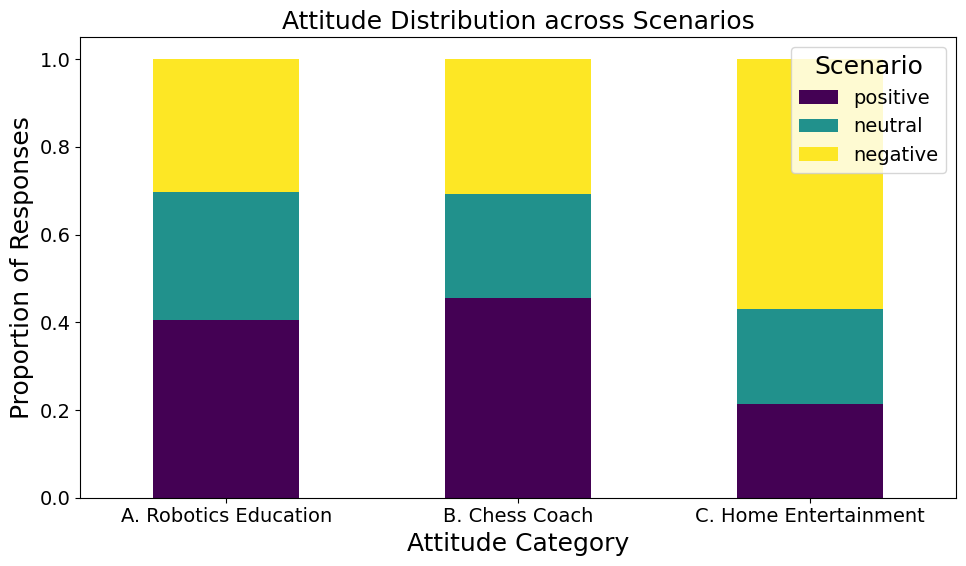

DataFrame with attitude proportions:
                A. Robotics Education  B. Chess Coach  C. Home Entertainment
Category_Final                                                              
positive                     0.405128        0.454976               0.214660
neutral                      0.292308        0.236967               0.214660
negative                     0.302564        0.308057               0.570681


In [73]:
combined_df = pd.read_csv('Q7_annotated_three_scenarios_final.csv')

if not combined_df.empty:
    # Define categories and scenario labels for consistent indexing and plotting order
    categories = ["positive", "neutral", "negative"]
    scenario_labels = ['A. Robotics Education', 'B. Chess Coach', 'C. Home Entertainment']
    group_id_mapping = {'A. Robotics Education': 1, 'B. Chess Coach':2, 'C. Home Entertainment':3}

    # Calculate the proportion of each category within each scenario
    category_proportions = {}
    for scenario in scenario_labels:
        scenario_data = combined_df[combined_df['Group'] == group_id_mapping[scenario]]
        category_counts = scenario_data['Category_Final'].value_counts(normalize=True).reindex(categories).fillna(0)
        category_proportions[scenario] = category_counts

    # Create a DataFrame to store the proportions, reindex to ensure categories order
    attitude_df = pd.DataFrame(category_proportions).reindex(categories)
    
    # Plotting the attitude distribution
    attitude_df.T.plot(kind='bar', stacked=True, cmap="viridis",figsize=(10, 6), legend=False)
    plt.title('Attitude Distribution across Scenarios')
    plt.xlabel('Attitude Category')
    plt.ylabel('Proportion of Responses')
    plt.xticks(rotation=0)
    plt.legend(title='Scenario')
    plt.tight_layout()
    plt.show()

    print("DataFrame with attitude proportions:")
    print(attitude_df)
else:
    print("No data to process.")